In [1]:
from manim import *

Manim Community v0.16.0

In [2]:
config.media_width = "100%"
config.media_embed = True

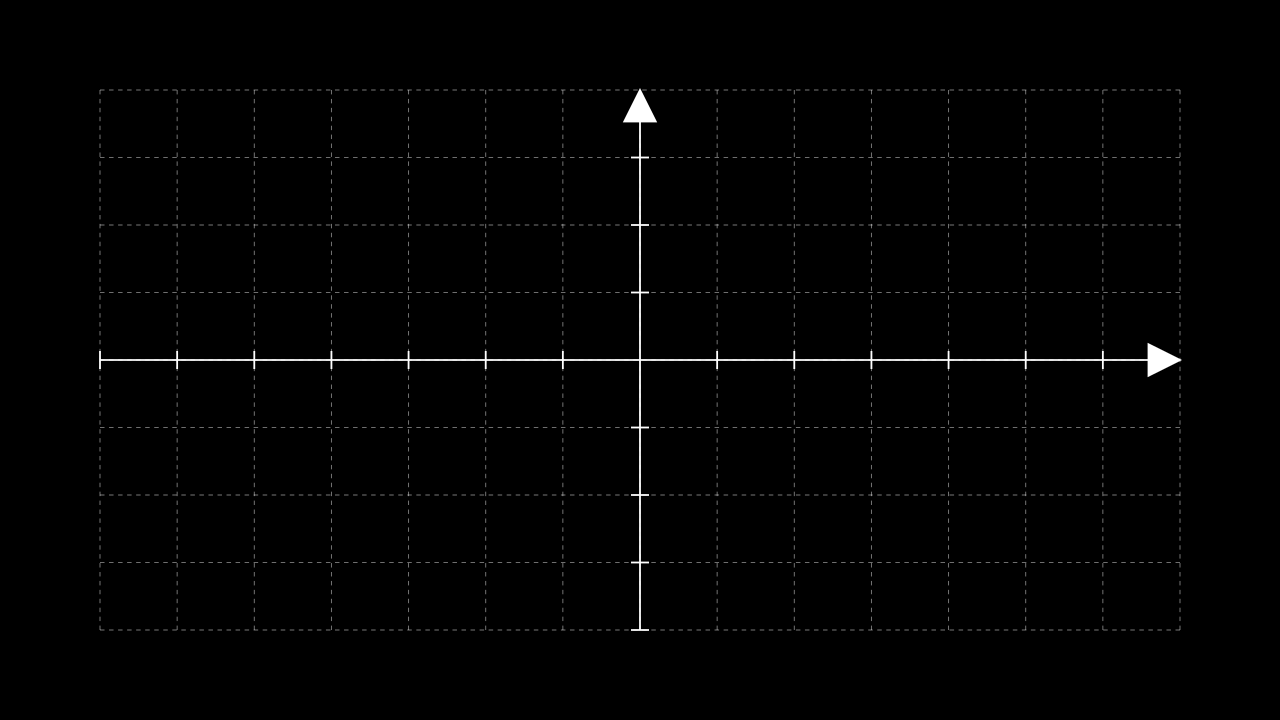

In [3]:
%%manim -qm -v WARNING E1

class E1(Scene):
    def construct(self):
        axes = Axes()
        x_min,x_max,x_res = axes.x_range
        y_min,y_max,y_res = axes.y_range

        h_lines = VGroup(*[
            DashedLine(
                axes.c2p(x_min,y),
                axes.c2p(x_max,y),
                stroke_opacity=0.5,
                stroke_width=1,
            )
            for y in np.arange(y_min,y_max+y_res,y_res)
        ])
        v_lines = VGroup(*[
            DashedLine(
                axes.c2p(x,y_min),
                axes.c2p(x,y_max),
                stroke_opacity=0.5,
                stroke_width=1,
            )
            for x in np.arange(x_min,x_max+x_res,x_res)
        ])

        self.add(axes,h_lines,v_lines)

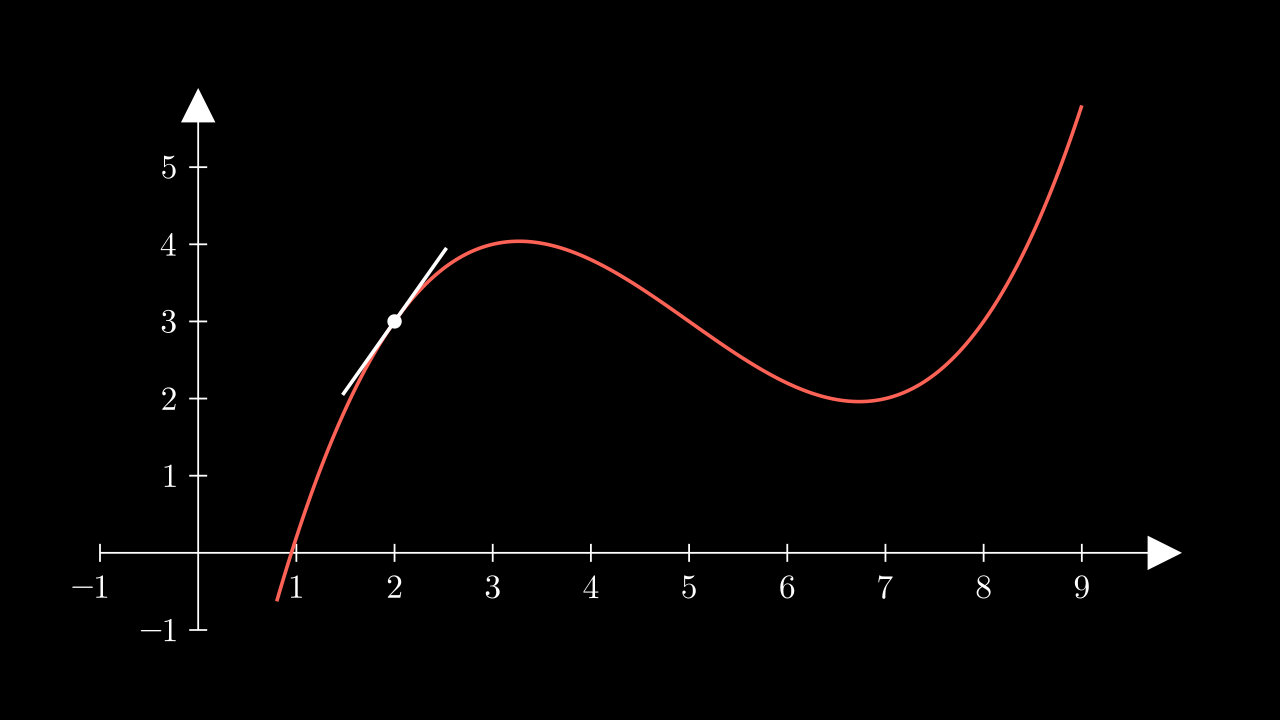

In [4]:
%%manim -qm -v WARNING E2

class E2(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)

        x_val = 2
        dot_at_x = Dot(axes.i2gp(x_val,plot))
        dx = 0.0001
        dx_vector = axes.i2gp(x_val+dx,plot) - axes.i2gp(x_val,plot)
        dx_vector_angle = angle_of_vector(dx_vector)

        pending = Line(LEFT,RIGHT)\
            .set_angle(dx_vector_angle)\
            .move_to(dot_at_x)

        self.add(axes,plot,dot_at_x,pending)

In [5]:
%%manim -qm -v WARNING E3

class E3(Scene):
    def construct(self):
        axes = Axes(
            x_range=(-1, 12, 1),
            y_range=(-1, 3, 1),
            x_length=12,
            y_length=7,
        )
        func = axes.plot(lambda x: 0.7*np.sqrt(x),x_range=[0,12,0.05])

        rects = VGroup(*[
                axes.get_riemann_rectangles(
                func,
                x_range=[1,11],
                dx=dx,
                input_sample_type="left",
                stroke_width=dx if dx > 0.1 else 0.8,
            )
                .set_color_by_gradient(PURPLE,ORANGE)
                .set_stroke(color=BLACK if dx > 0.1 else None)
            for dx in [1/(i) for i in range(1,15)]
        ])

        r = rects[0]

        self.add(axes,func,r)

        for rect in rects[1:]:
            self.play(
                Transform(r,rect)
            )
            self.wait(0.3)
        self.wait()

In [6]:
%%manim -qm -v WARNING E4

class E4(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[1,9,0.01],color=RED)

        init_dots = VGroup(*[
            Dot(axes.x_axis.n2p(x),color=YELLOW)
            for x in range(1,10)
        ])
        end_dots = VGroup(*[
            Dot(axes.i2gp(x,plot),color=RED)
            for x in range(1,10)
        ])
        arrows = VGroup(*[
            Arrow(i_d,e_d)
            for i_d,e_d in zip(init_dots,end_dots)
        ])

        self.add(axes,init_dots)
        self.wait()
        self.play(
            ReplacementTransform(init_dots,end_dots,run_time=4),
            *list(map(lambda m: GrowArrow(m,run_time=4.3),arrows)),
        )
        self.play(FadeOut(arrows))
        self.play(Create(plot,run_time=3))
        self.wait()


In [7]:
%%manim -qm -v WARNING E5

class E5(Scene):
    def construct(self):
        f = lambda x: x**2
        table = MathTable(
            [
                ["x","f(x)=x^2"],
                *[
                    [x,f(x)]
                    for x in range(6)
                ]
            ],
            include_outer_lines=True,
            h_buff=0.4,v_buff=0.4,line_config={"stroke_width":1}
        )
        table.scale(0.8)
        axes = Axes(
            x_range=[-1,6,1],
            y_range=[-1,26,1],
            x_length=5,
            y_length=11,
            axis_config={"include_numbers": True}
        )
        axes.set(height=config.frame_height-1)
        VGroup(table,axes).arrange(RIGHT,aligned_edge=UP)
        #                0    1    2
        y_tex = MathTex("y=","1","^2")\
            .next_to(table,DOWN)
        y_tex[1:].fade(1)
        _exp_2 = y_tex[-1].copy()
        y_tex_result_grp = VGroup(*[
            MathTex("y=",f"{f(x)}")\
                .align_to(y_tex,LEFT)
                .align_to(y_tex,DOWN)
            for x in range(6)
        ])
        # -------------------------
        cols = table.get_columns()
        cols[0].set_color(RED) # x col
        cols[1].set_color(BLUE) # fx col

        x_vals  = cols[0][1:]
        fx_vals = cols[1][1:]
        # table[0].remove(*x_vals) # remove x_vals  from table
        table[0].remove(*fx_vals) # remove fx_vals from table

        self.play(
            Write(table),
            Write(axes),
        )
        self.play(Write(y_tex))
        self.wait()
        for _x,_y,ytr in zip(x_vals,fx_vals,y_tex_result_grp):
            _x_copy = _x.copy()
            self.play(_x_copy.animate.match_height(y_tex[1]).move_to(y_tex[1]))
            _exp_2_copy = _exp_2.copy()
            _exp_2_copy.set_opacity(1)
            self.play(Write(_exp_2_copy))
            tmp_grp = VGroup(_x_copy,_exp_2_copy)
            _y_target = ytr[-1]
            self.play(
                ReplacementTransform(tmp_grp,_y_target)
            )
            self.wait()
            self.play(ReplacementTransform(_y_target,_y[0]))
            self.wait()
            # print(f"x: {_x.get_tex_string()}")
            dot = Dot(axes.c2p(float(_x.get_tex_string()),float(_y.get_tex_string())))
            lines = axes.get_lines_to_point(dot.get_center())
            self.play(
                ReplacementTransform(
                    VGroup(_x,_y).copy(),dot
                ),
                Create(lines)
            )
            self.wait()
        self.wait()



In [8]:
def interpolate_color_range(*colors):
    alpha = colors[-1]
    colors = colors[:-1]
    partition = len(colors)
    dx = 1 / (partition-1)
    
    colors_steps = [
        (colors[i],colors[i+1])
        for i in range(partition-1)
    ]

    alpha_steps = [
        (dx * i, dx * (i+1))
        for i in range(partition-1)
    ]

    i_count = 0

    for c_s,a_s in zip(colors_steps,alpha_steps):
        if a_s[0] <= alpha <= a_s[1]:
            d_alpha = alpha - dx * i_count
            c_alpha = d_alpha / dx
            return interpolate_color(c_s[0], c_s[1], c_alpha)
        i_count += 1

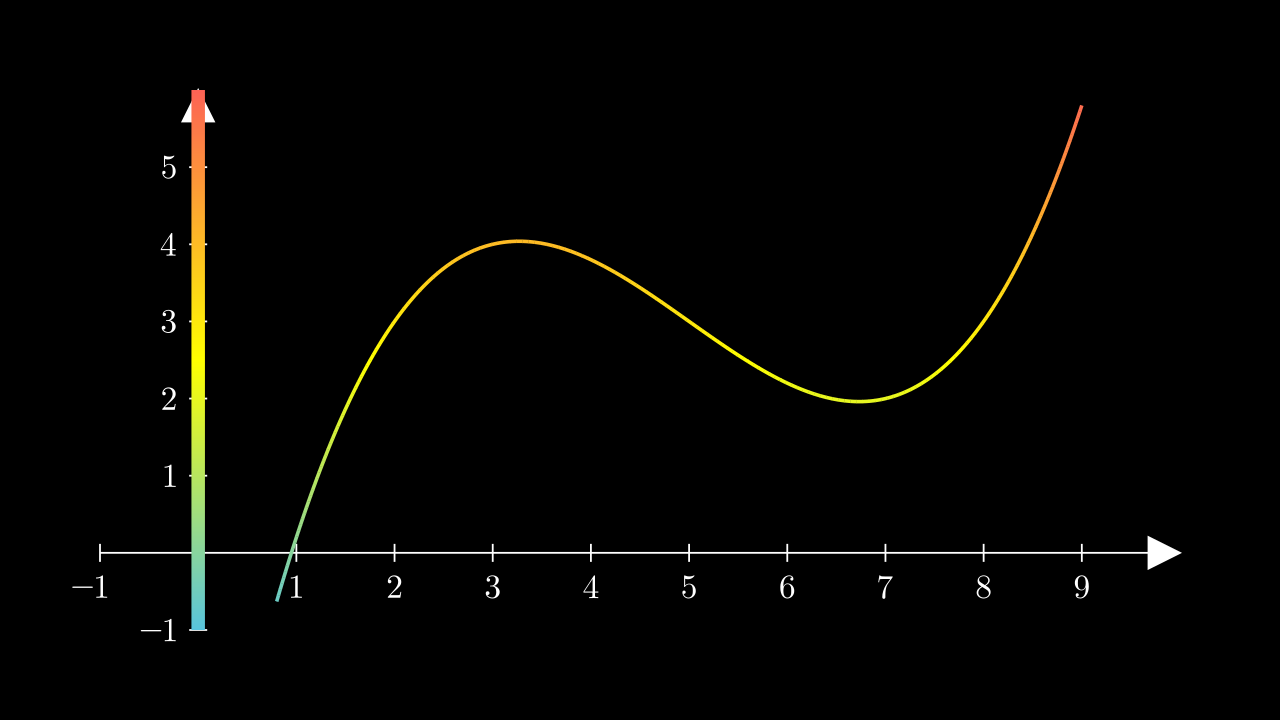

In [9]:
%%manim -qm -v WARNING E6

class E6(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)

        color_gradient = [BLUE,YELLOW,RED]
        line_color = Line(
            axes.y_axis.n2p(-1),
            axes.y_axis.n2p(6),
            stroke_width=15
        )
        line_color.set_color(color=color_gradient)
        line_color.set_sheen_direction(UP)

        Y_MIN, Y_MAX, Y_STEP = axes.y_range
        Y_MIN = axes.y_axis.n2p(Y_MIN)[1]
        Y_MAX = axes.y_axis.n2p(Y_MAX)[1]
        DY = Y_MAX - Y_MIN

        plot_pieces = DashedVMobject(plot,num_dashes=200,dashed_ratio=1.05)
        for p in plot_pieces:
            y_coord = p.get_center()[1]
            alpha = (y_coord - Y_MIN) / DY
            c = interpolate_color_range(*color_gradient, alpha)
            p.set_color(c)

        self.add(axes,plot_pieces,line_color)

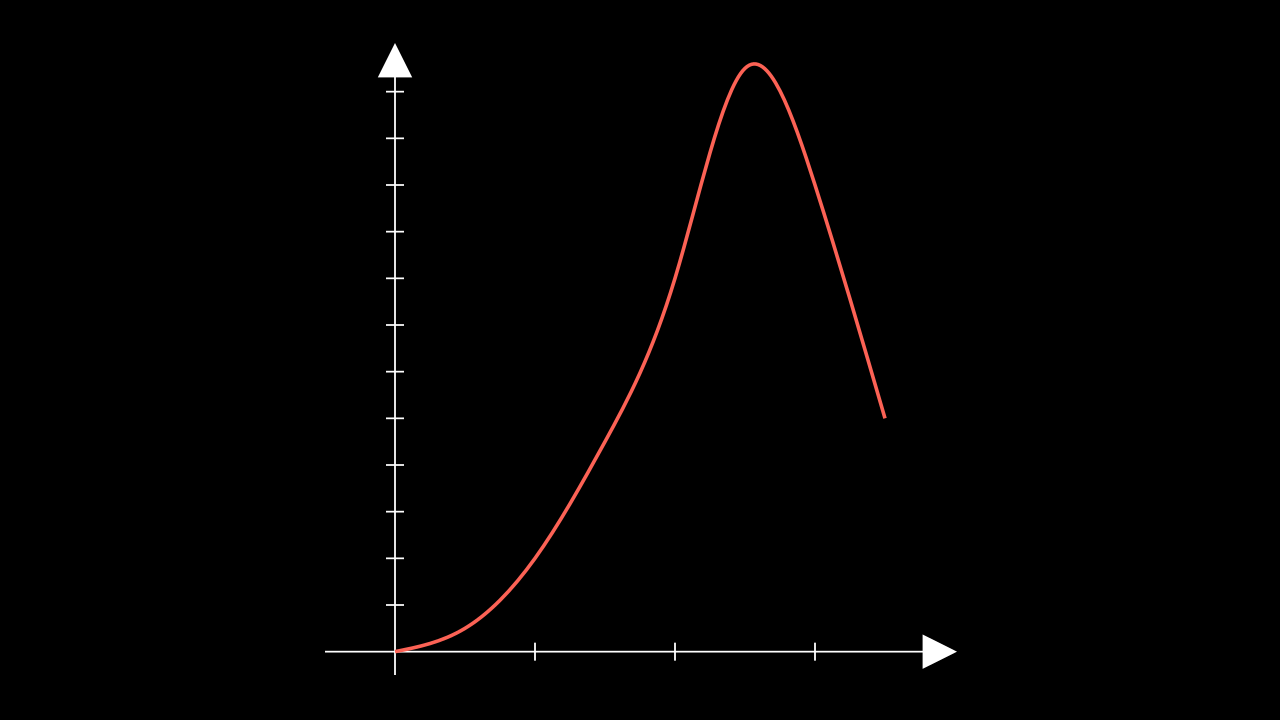

In [10]:
%%manim -qm -v WARNING E7

class E7(Scene):
    def construct(self):
        x = [0 , 1, 2, 3,  4,  5,  6,  7]
        y = [0 , 1, 4, 9, 16, 25, 20, 10]
        X_MIN = min(x)-1
        X_MAX = max(x)+1
        Y_MIN = min(y)-1
        Y_MAX = max(y)+1
        STEP = 2

        axes = Axes(
            x_range=(X_MIN,X_MAX,STEP),
            y_range=(Y_MIN,Y_MAX,STEP),
            x_length=7,
            y_length=7
        )

        coords = [axes.c2p(_x,_y) for _x,_y in zip(x,y)]

        graph = VMobject(color=RED).set_points_smoothly(coords)

        self.add(axes,graph)

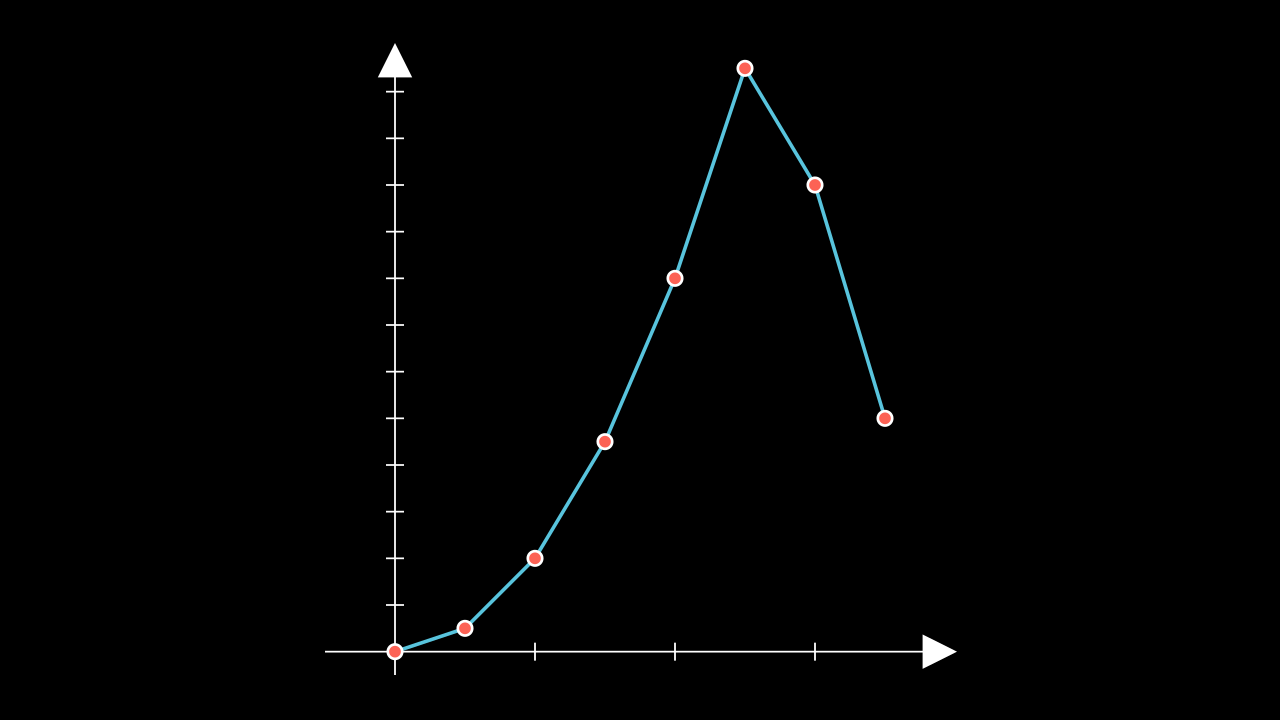

In [11]:
%%manim -qm -v WARNING E8

class E8(Scene):
    def construct(self):
        x = [0 , 1, 2, 3,  4,  5,  6,  7]
        y = [0 , 1, 4, 9, 16, 25, 20, 10]
        X_MIN = min(x)-1
        X_MAX = max(x)+1
        Y_MIN = min(y)-1
        Y_MAX = max(y)+1
        STEP = 2

        axes = Axes(
            x_range=(X_MIN,X_MAX,STEP),
            y_range=(Y_MIN,Y_MAX,STEP),
            x_length=7,
            y_length=7
        )

        graph = axes.plot_line_graph(
            x_values = x,
            y_values = y,
            line_color=BLUE,
            vertex_dot_style={"stroke_width": 3, "fill_color": RED},
            stroke_width = 4,
        )

        self.add(axes,graph)

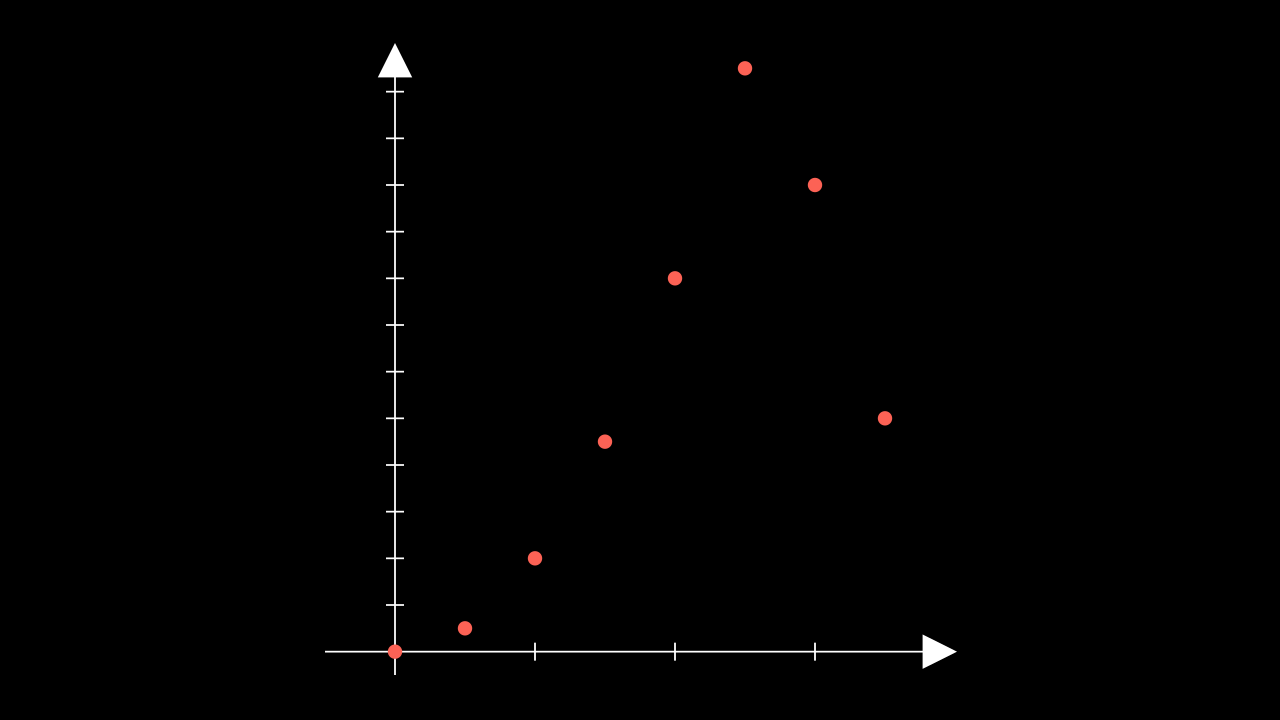

In [12]:
%%manim -qm -v WARNING E9

class E9(Scene):
    def construct(self):
        x = [0 , 1, 2, 3,  4,  5,  6,  7]
        y = [0 , 1, 4, 9, 16, 25, 20, 10]
        X_MIN = min(x)-1
        X_MAX = max(x)+1
        Y_MIN = min(y)-1
        Y_MAX = max(y)+1
        STEP = 2

        axes = Axes(
            x_range=(X_MIN,X_MAX,STEP),
            y_range=(Y_MIN,Y_MAX,STEP),
            x_length=7,
            y_length=7
        )
        points = VGroup(*[
            Dot(axes.c2p(_x,_y))
            for _x,_y in zip(x,y)
        ]).set_color(RED)

        self.add(axes,points)

In [13]:
def get_coords_from_csv(file_name):
    import csv
    coords = []
    with open(f'{file_name}.csv', 'r') as csvFile:
        reader = csv.reader(csvFile)
        for row in reader:
            x,y = row
            coord = np.array([float(x),float(y)])
            coords.append(coord)
    csvFile.close()
    return np.array(coords)

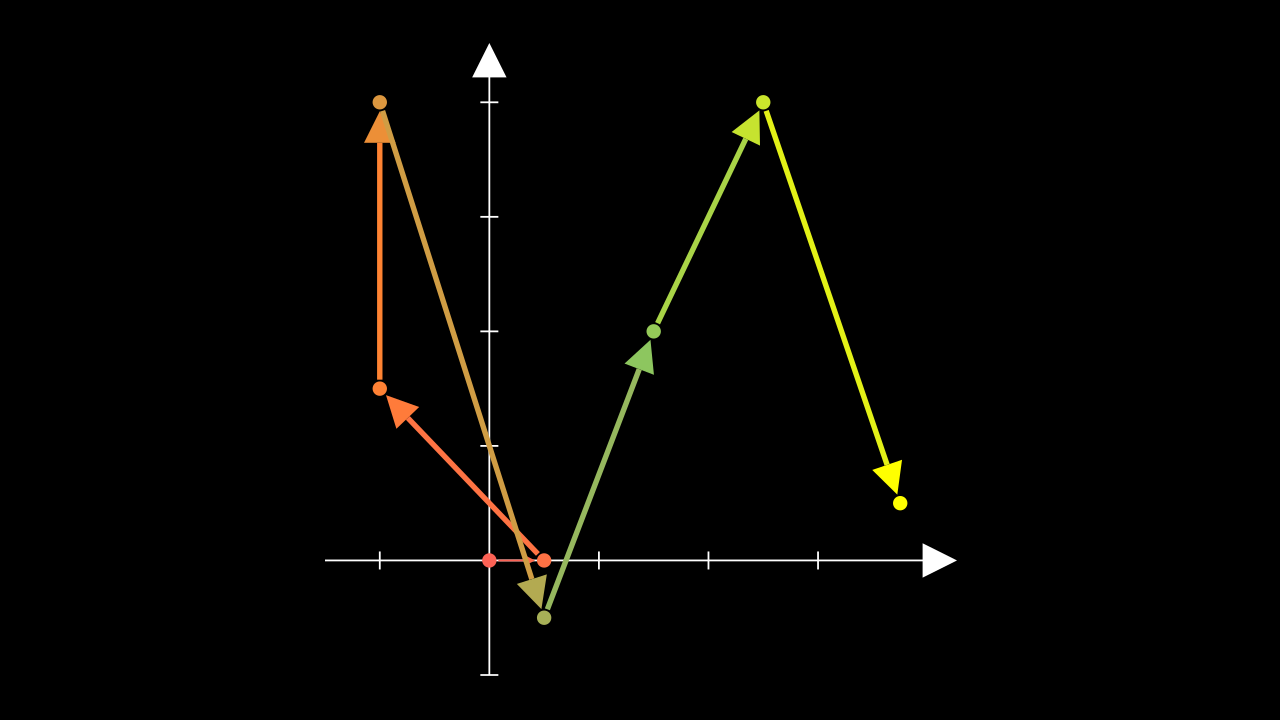

In [15]:
%%manim -qm -v WARNING E10

class E10(Scene):
    def construct(self):
        data = get_coords_from_csv("./assets/data")
        x = data[:,0]
        y = data[:,1]
        X_MIN = min(x)-1
        X_MAX = max(x)+1
        Y_MIN = min(y)-1
        Y_MAX = max(y)+1
        STEP = 2

        axes = Axes(
            x_range=(X_MIN,X_MAX,STEP),
            y_range=(Y_MIN,Y_MAX,STEP),
            x_length=7,
            y_length=7
        )
        points = VGroup(*[
            Dot(axes.c2p(_x,_y))
            for _x,_y in data
        ]).set_color_by_gradient(RED,ORANGE,GREEN,YELLOW)
        arrows = VGroup(*[
            Arrow(points[i].get_center(),points[i+1].get_center(),buff=0.1)
            for i in range(len(points)-1)
        ]).set_color_by_gradient(RED,ORANGE,GREEN,YELLOW)

        self.add(axes,points,arrows)

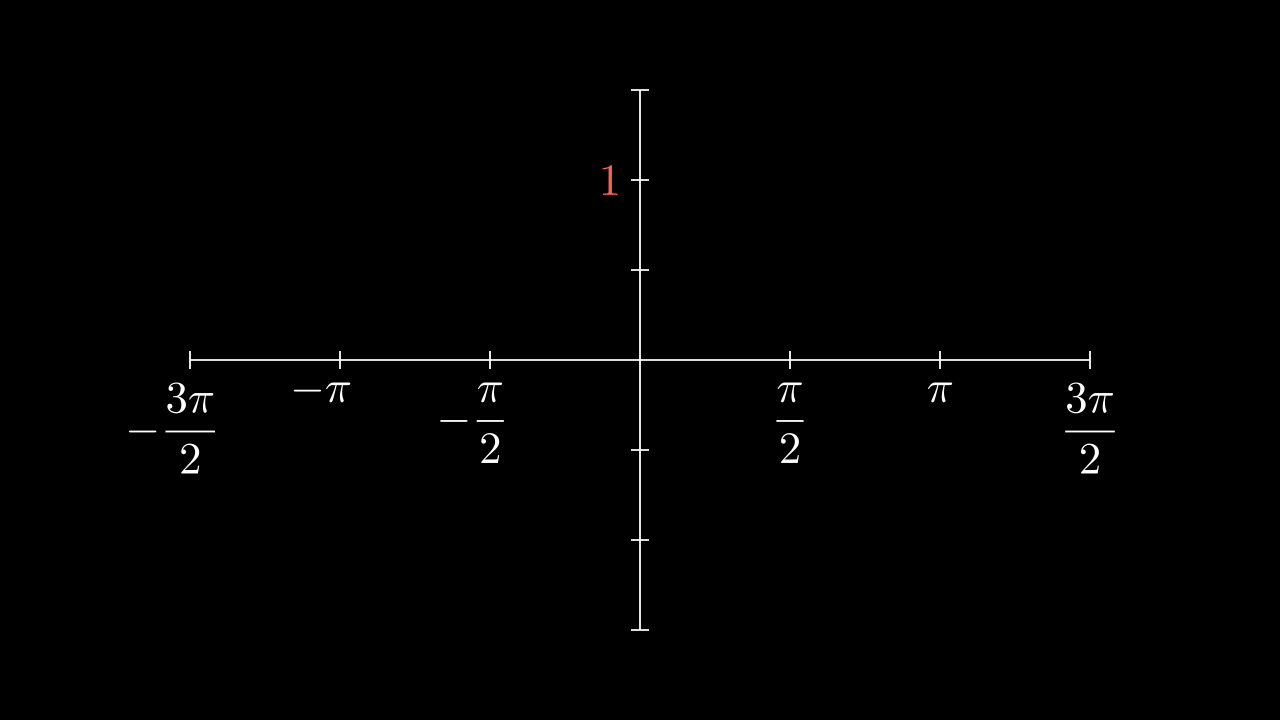

In [16]:
%%manim -qm -v WARNING E11

class E11(Scene):
    def construct(self):
        x_labels = [
            "-\\frac{3\\pi}{2}", #  -3pi/2
            "-\\pi", #              -pi
            "-\\frac{\\pi}{2}", #   -pi/2
            "0", #                   Blank
            "\\frac{\\pi}{2}", #     pi/2
            "\\pi",#                 pi
            "\\frac{3\\pi}{2}" #     3pi/2
        ]
        axes = Axes(
            x_range = (-3*PI/2, 3*PI/2, PI/2),
            y_range = (-1.5, 1.5, 0.5),
            x_length = 10,
            axis_config={"include_tip": False}
        )
        axes.center() # center axes to the screen
        y_label = MathTex(1,color=RED).next_to(axes.y_axis.n2p(1),LEFT)

        x_tex_lables = VGroup(*[
            MathTex(t).next_to(axes.x_axis.n2p(x),DOWN) if x >= 0 else
            # Shift pi<0 labels to left
            MathTex(t).next_to(axes.x_axis.n2p(x),DOWN).shift(LEFT*0.2)
            for t,x in zip(x_labels,np.arange(-3*PI/2, 3*PI/2+PI/2, PI/2)) if t != "0"
            #                                                              Ignore 0 value
        ])
        self.add(axes,y_label,x_tex_lables)

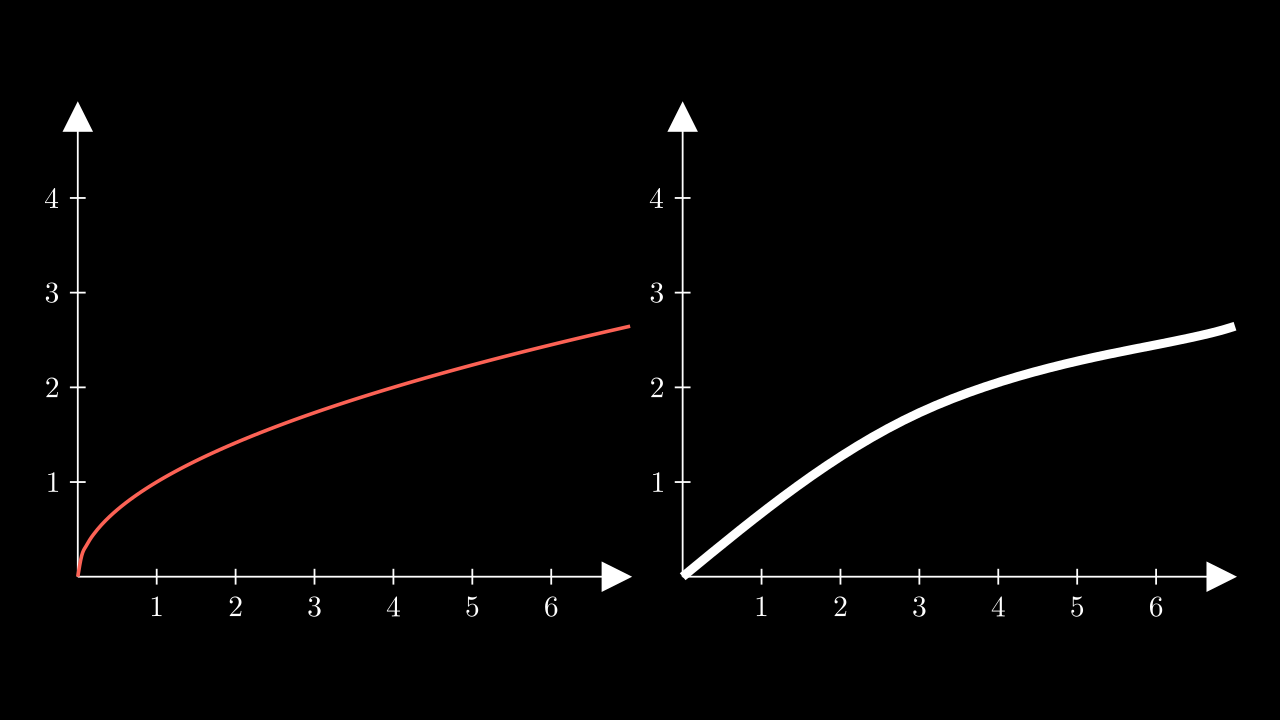

In [17]:
%%manim -qm -v WARNING E12

class E12(Scene):
    def construct(self):
        # Define axes
        axes_left = Axes(
            x_range = (0, 7, 1),
            y_range = (0, 5, 1),
            x_length = 7,
            axis_config={"include_numbers": True},
        )
        axes_right = axes_left.copy()
        axes = VGroup(axes_left,axes_right).arrange(RIGHT)
        axes.width=config.frame_width-1
        # Define graphs
        function = lambda x: np.sqrt(x)

        # good resolution
        left_graph  = axes_left.plot(function, x_range=(0, 7, 0.05),color=RED)
        # bad resolution                                      |--> Resolution
        right_graph = axes_right.plot(function,x_range=(0, 7, 3),stroke_width=10)

        self.add(
            axes,
            left_graph,right_graph
        )

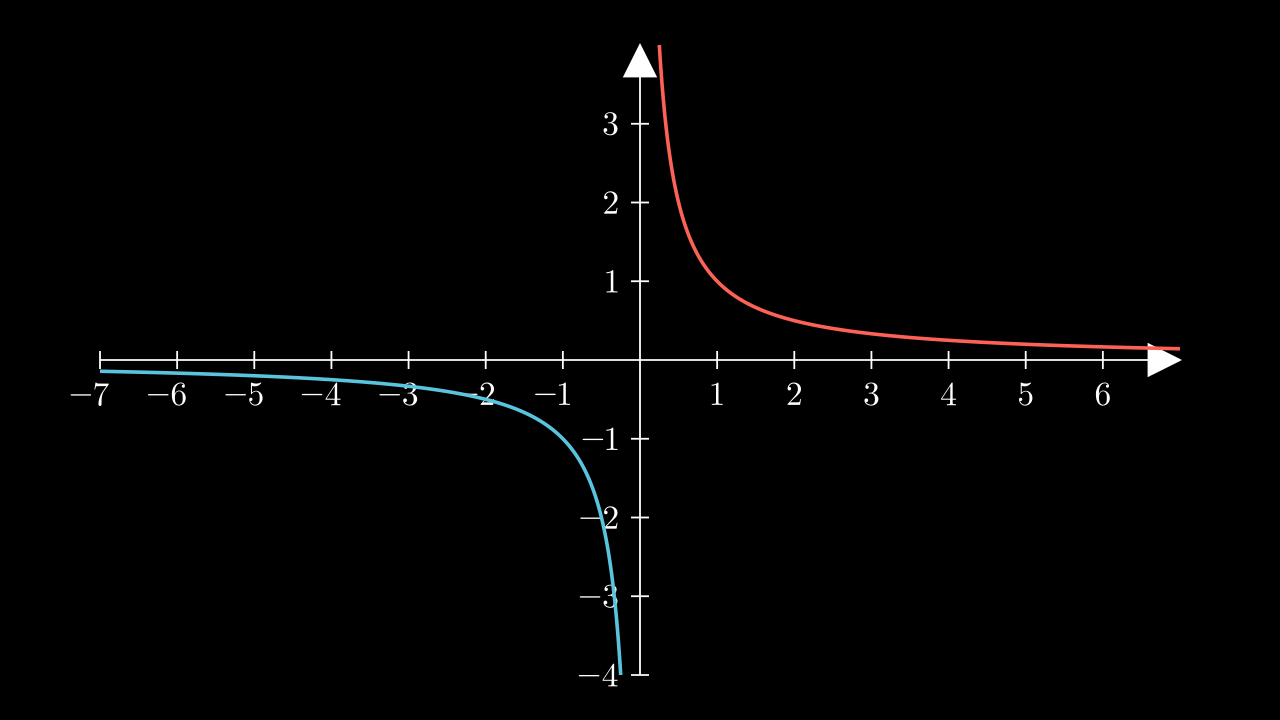

In [18]:
%%manim -qm -v WARNING E13

class E13(Scene):
    def construct(self):
        axes = Axes(
            x_range = (-7, 7, 1),
            y_range = (-4, 4, 1),
            x_length = 12,
            y_length = 7,
            axis_config={"include_numbers": True},
        )
        left_plot  = axes.plot(lambda x: 1/x, x_range=[-7,-1/4,0.01],color=BLUE)
        right_plot = axes.plot(lambda x: 1/x, x_range=[1/4,7,0.01],color=RED)

        self.add(axes,left_plot,right_plot)

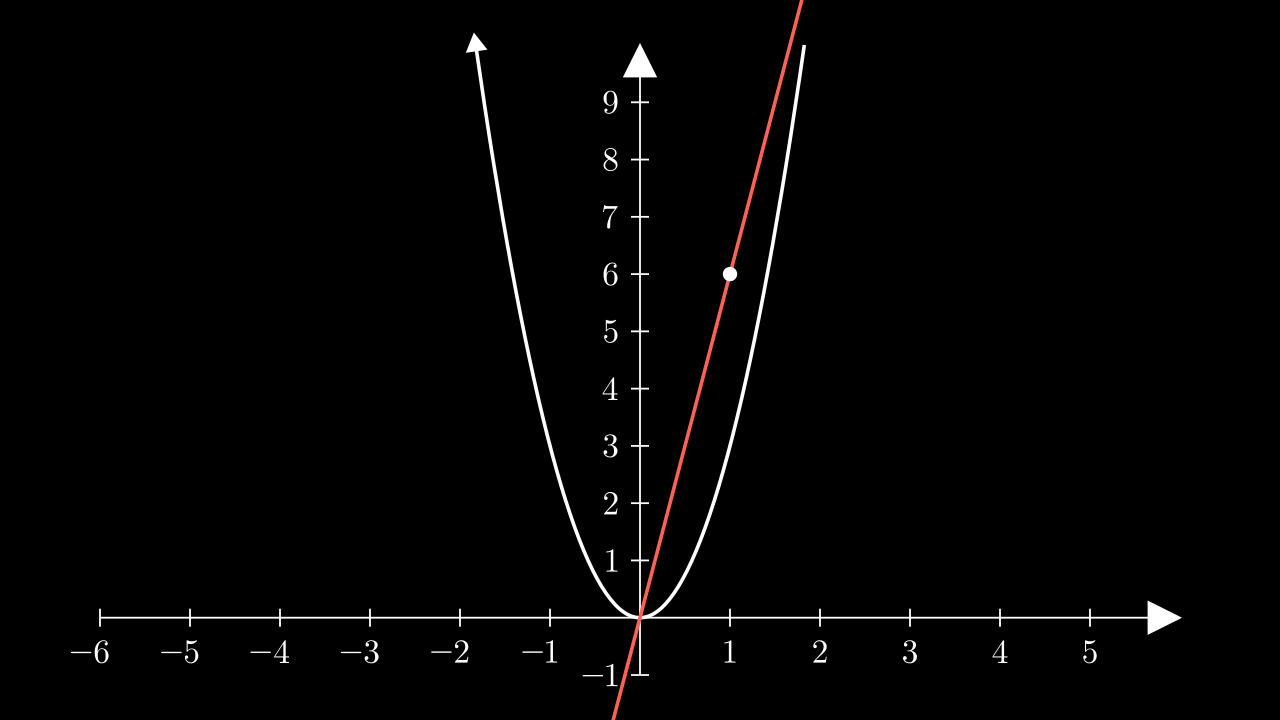

In [19]:
%%manim -qm -v WARNING E14

class E14(Scene):
    def construct(self):
        axes = Axes(
            x_range = (-6, 6, 1),
            y_range = (-1, 10, 1),
            x_length = 12,
            y_length = 7,
            axis_config={"include_numbers": True},
        )
        parabola = axes.plot(lambda x: 3*x**2, x_range=[-np.sqrt(10/3),np.sqrt(10/3)])
        # Custom tips
        left_tip = Triangle(fill_opacity=1,color=WHITE)\
            .set(height=0.15)\
            .rotate(PI/2).rotate(TangentLine(parabola,0).get_angle())
        left_tip.shift(parabola.point_from_proportion(0)-left_tip.get_center_of_mass())

        derivative = axes.plot_derivative_graph(parabola,RED)
        dot = Dot(axes.c2p(1,6))

        self.add(axes,left_tip,parabola,derivative,dot)

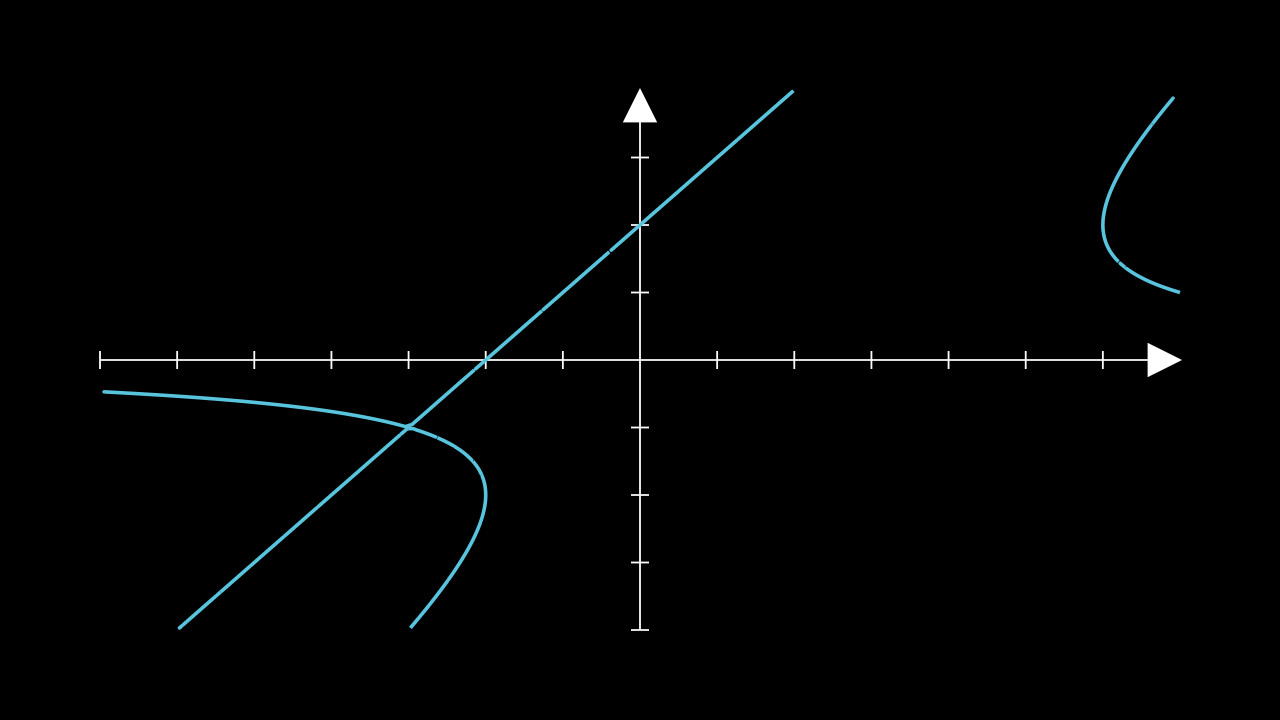

In [20]:
%%manim -qm -v WARNING E15

class E15(Scene):
    def construct(self):
        ax = Axes()
        a = ax.plot_implicit_curve(
            lambda x, y: y * (x - y) ** 2 - 4 * x - 8, color=BLUE
        )
        self.add(ax, a)

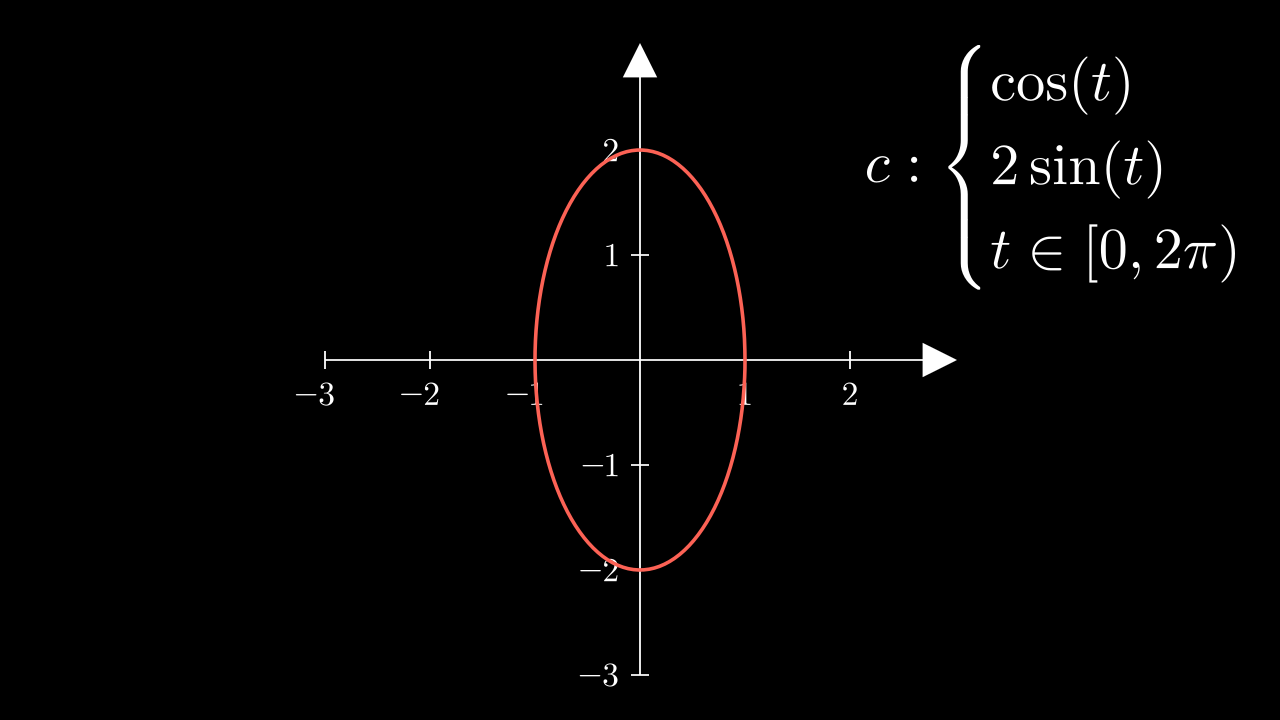

In [21]:
%%manim -qm -v WARNING E16

class E16(Scene):
    def construct(self):
        # Define axes
        axes = Axes(
            x_range = (-3, 3, 1),
            y_range = (-3, 3, 1),
            x_length = 7, y_length = 7,
            axis_config={"include_numbers": True},
        )
        parametric_func = axes.plot_parametric_curve(
            lambda t: np.array([
                np.cos(t),   # x
                2*np.sin(t), # y
            ]),
            t_range=(0,2*PI,0.1),
            # Domain <---| |----> resolution
            color=RED
        )
        equations = MathTex(r"""
        c:\begin{cases}
            \cos(t)\\
            2\sin(t)\\
            t\in [0,2\pi)
        \end{cases}
        """).scale(1.3)
        equations.to_corner(UR)
        self.add(axes,parametric_func,equations)

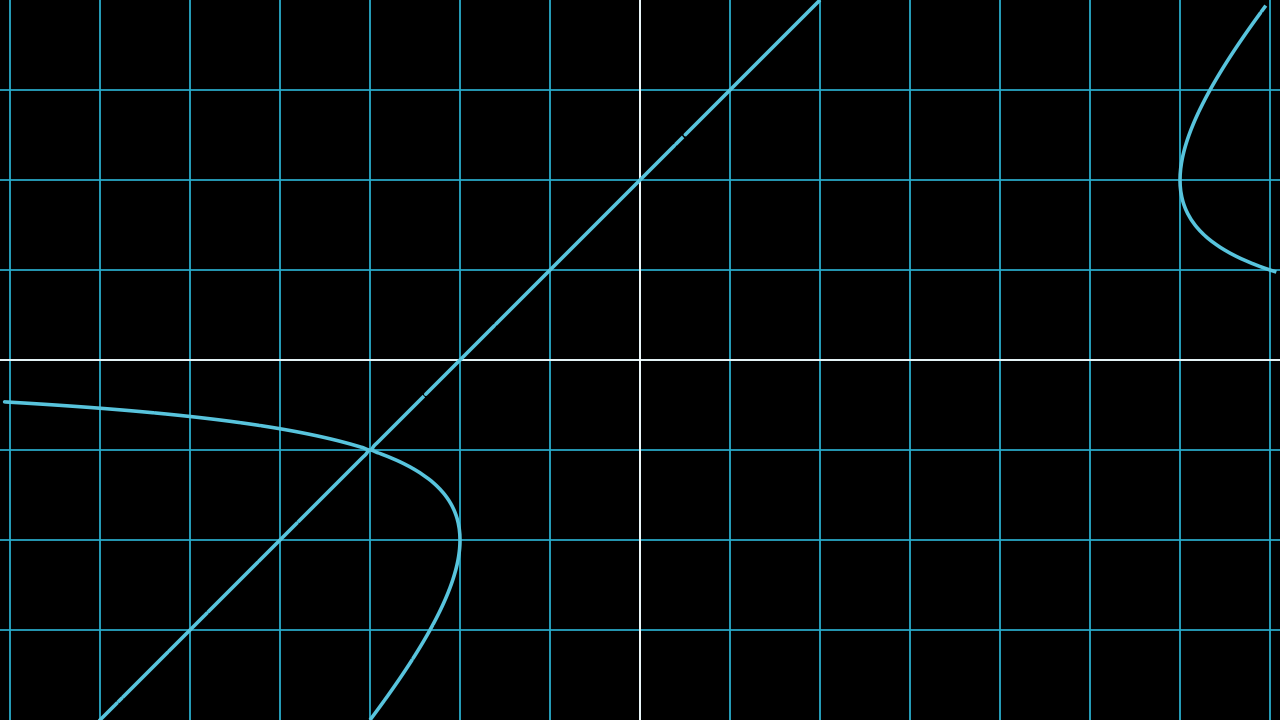

In [22]:
%%manim -qm -v WARNING E17

class E17(Scene):
    def construct(self):
        ax = NumberPlane()
        a = ax.plot_implicit_curve(
            lambda x, y: y * (x - y) ** 2 - 4 * x - 8, color=BLUE
        )
        self.add(ax, a)

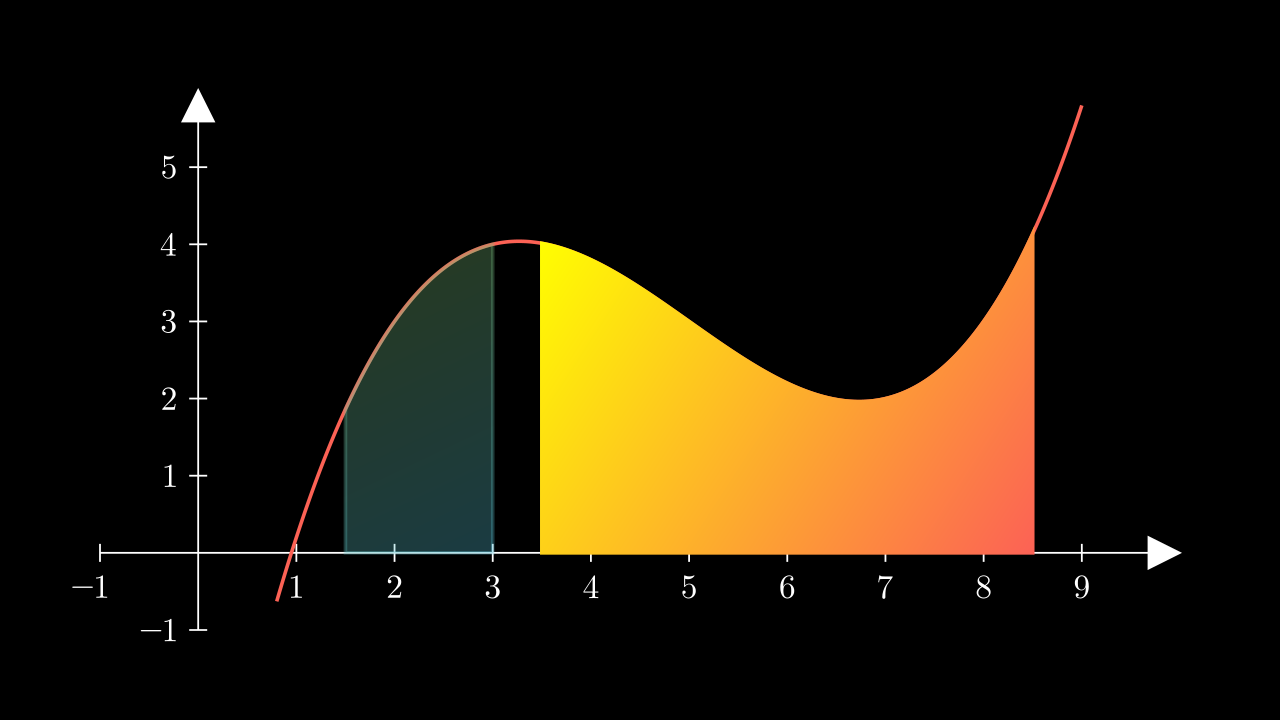

In [23]:
%%manim -qm -v WARNING E18

class E18(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)
        # Get area
        area1= axes.get_area(plot,x_range=[1.5,3])
        area2= axes.get_area(plot,x_range=[3.5,8.5],opacity=1,color=[RED,YELLOW])

        self.add(axes,plot,area1,area2)

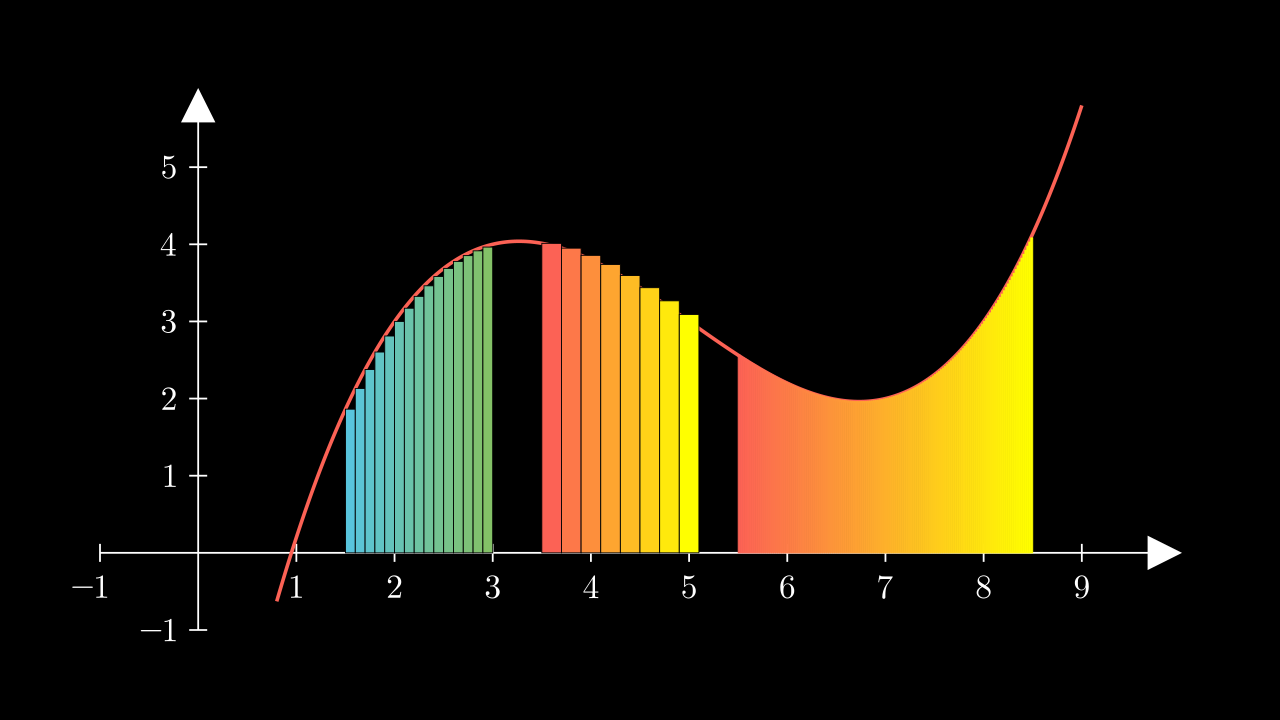

In [24]:
%%manim -qm -v WARNING E19

class E19(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)
        # Get area
        rr1 = axes.get_riemann_rectangles(plot,x_range=[1.5,3]) # dx = 0.1 by default
        rr2 = axes.get_riemann_rectangles(plot,x_range=[3.5,5],dx=0.2,color=[RED,YELLOW])

        area_rr = axes.get_riemann_rectangles(
            plot,
            x_range=[5.5,8.5],
            dx=0.02
        ).set_color_by_gradient(RED,YELLOW)

        self.add(axes,plot,rr1,rr2,area_rr)

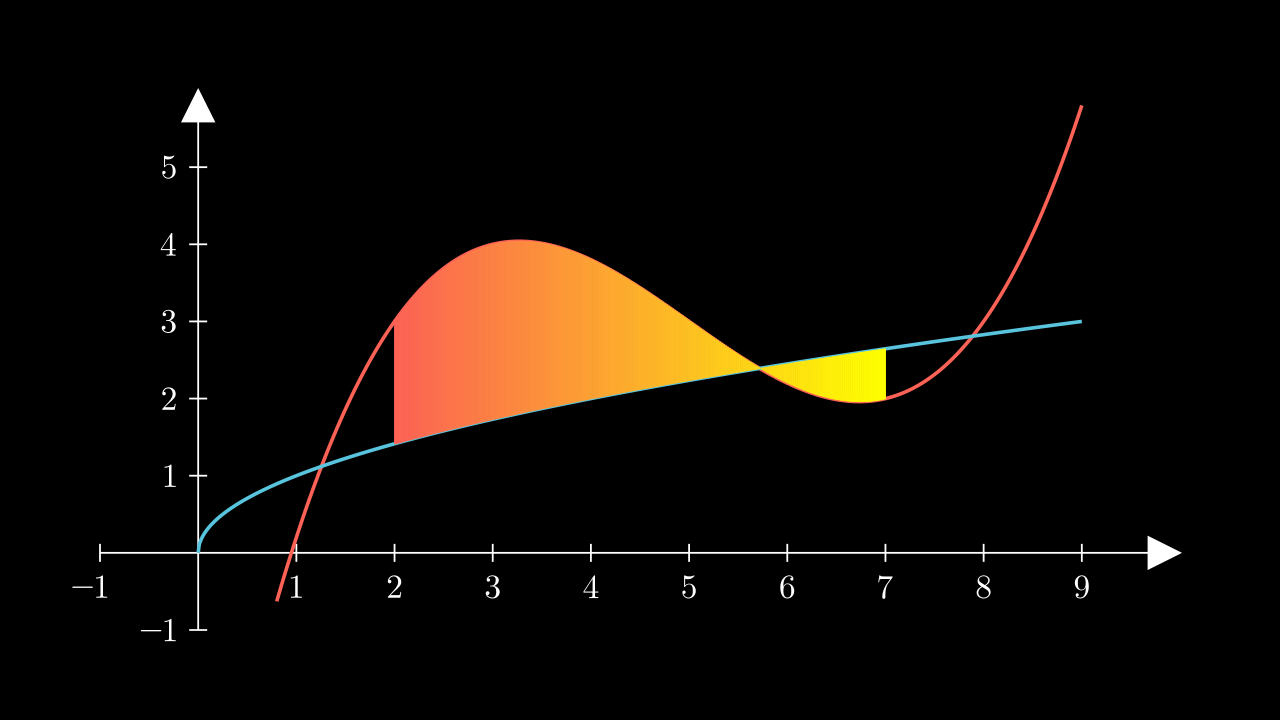

In [25]:
%%manim -qm -v WARNING E20

class E20(Scene):
    def construct(self):
        func1 = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        func2 = lambda x: x**(1/2)
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot1 = axes.plot(func1,x_range=[0.8,9,0.01],color=RED)
        plot2 = axes.plot(func2,x_range=[0,9,0.01],color=BLUE)

        area = axes.get_riemann_rectangles(
            plot1,
            bounded_graph=plot2,
            dx=0.02,
            x_range=[2, 7],
        ).set_color_by_gradient(RED,YELLOW)

        self.add(axes,plot1,plot2,area)


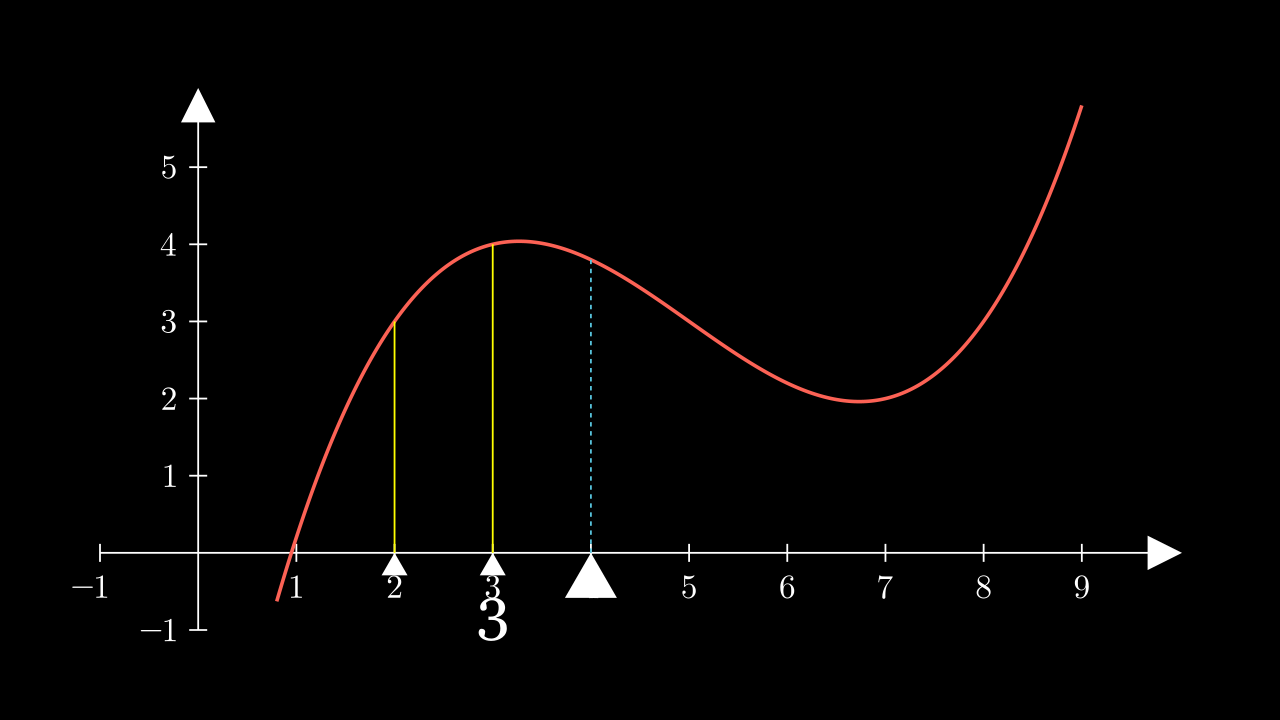

In [26]:
%%manim -qm -v WARNING E21

class E21(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)

        t_label_at_2 = axes.get_T_label(x_val=2, graph=plot)
        t_label_at_3 = axes.get_T_label(x_val=3, graph=plot, label=Text("3"))
        t_label_at_4 = axes.get_T_label(x_val=4, graph=plot, triangle_size=0.5, line_func=DashedLine, line_color=BLUE)

        self.add(axes,plot,t_label_at_2,t_label_at_3,t_label_at_4)

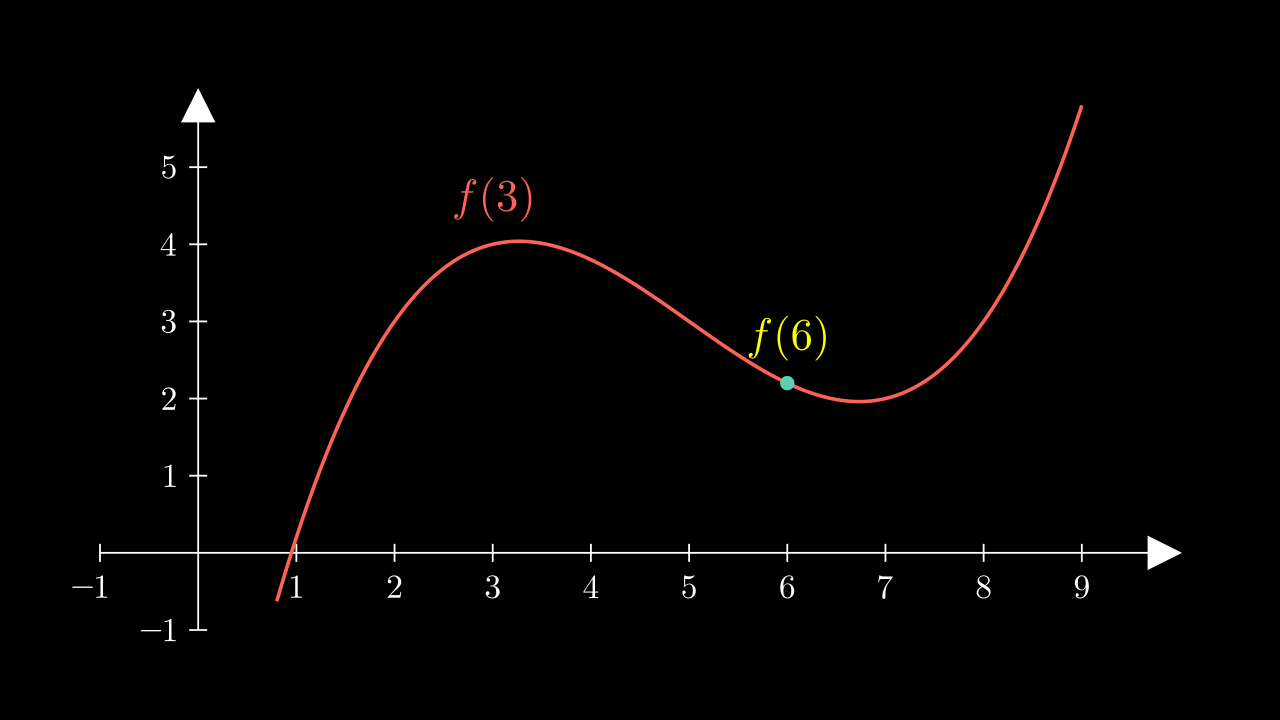

In [27]:
%%manim -qm -v WARNING E22

class E22(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)
        # Graph label
        label_at_3 = axes.get_graph_label(plot,"f(3)",3,UP)
        label_at_6 = axes.get_graph_label(
            graph=plot,
            label= MathTex(r"f(6)"),
            x_val=6,
            dot=True,
            direction=UP,
            color=YELLOW,
            dot_config={"color": TEAL, "radius": 0.08}
        )

        self.add(axes,plot,label_at_3,label_at_6)

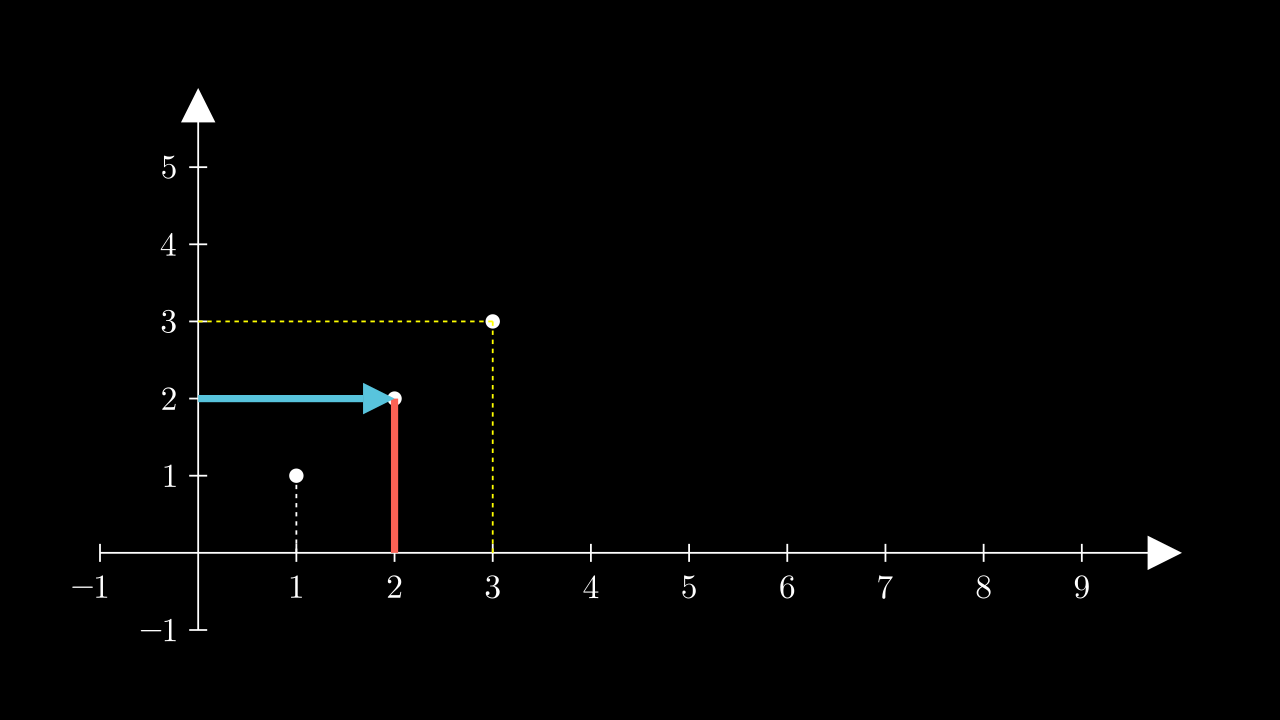

In [28]:
%%manim -qm -v WARNING E23

class E23(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )

        p1_1 = Dot(axes.c2p(1,1))
        v_line1 = axes.get_vertical_line(p1_1.get_center())

        p2_2 = Dot(axes.c2p(2,2))
        v_line2 = axes.get_vertical_line(p2_2.get_center(),line_func=Line,color=RED,stroke_width=8) # Line kwargs
        h_line2 = axes.get_horizontal_line(p2_2.get_center(),line_func=Line,color=BLUE,stroke_width=8) # Line kwargs
        h_line2.add_tip()

        p3_3 = Dot(axes.c2p(3,3))
        v_and_h_lines = axes.get_lines_to_point(p3_3.get_center(),color=YELLOW)

        self.add(
            axes,
            p1_1,v_line1,
            p2_2,v_line2,h_line2,
            p3_3,v_and_h_lines
        )

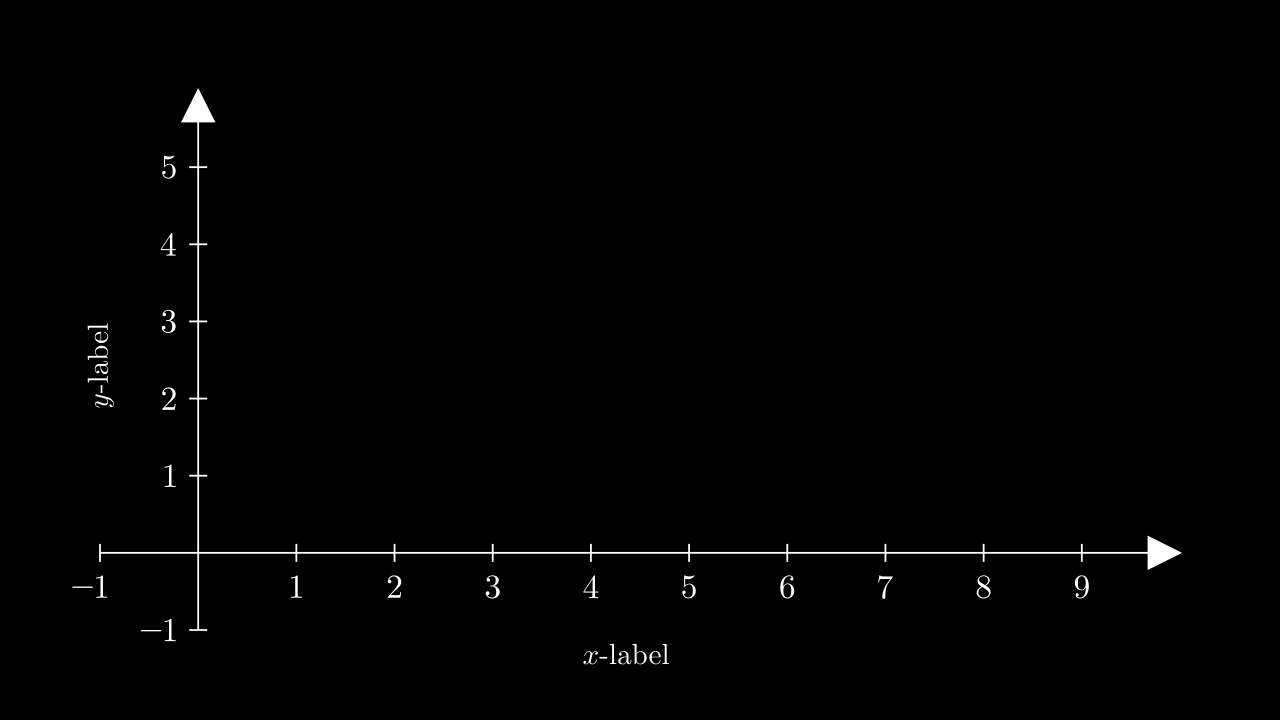

In [29]:
%%manim -qm -v WARNING E24

class E24(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )

        x_label = axes.get_x_axis_label(
            Tex("$x$-label").scale(0.65), edge=DOWN, direction=DOWN, buff=0.5
        )
        y_label = axes.get_y_axis_label(
            Tex("$y$-label").scale(0.65).rotate(90 * DEGREES),
            edge=LEFT,
            direction=LEFT,
            buff=0.3,
        )
        self.add(axes,x_label,y_label)

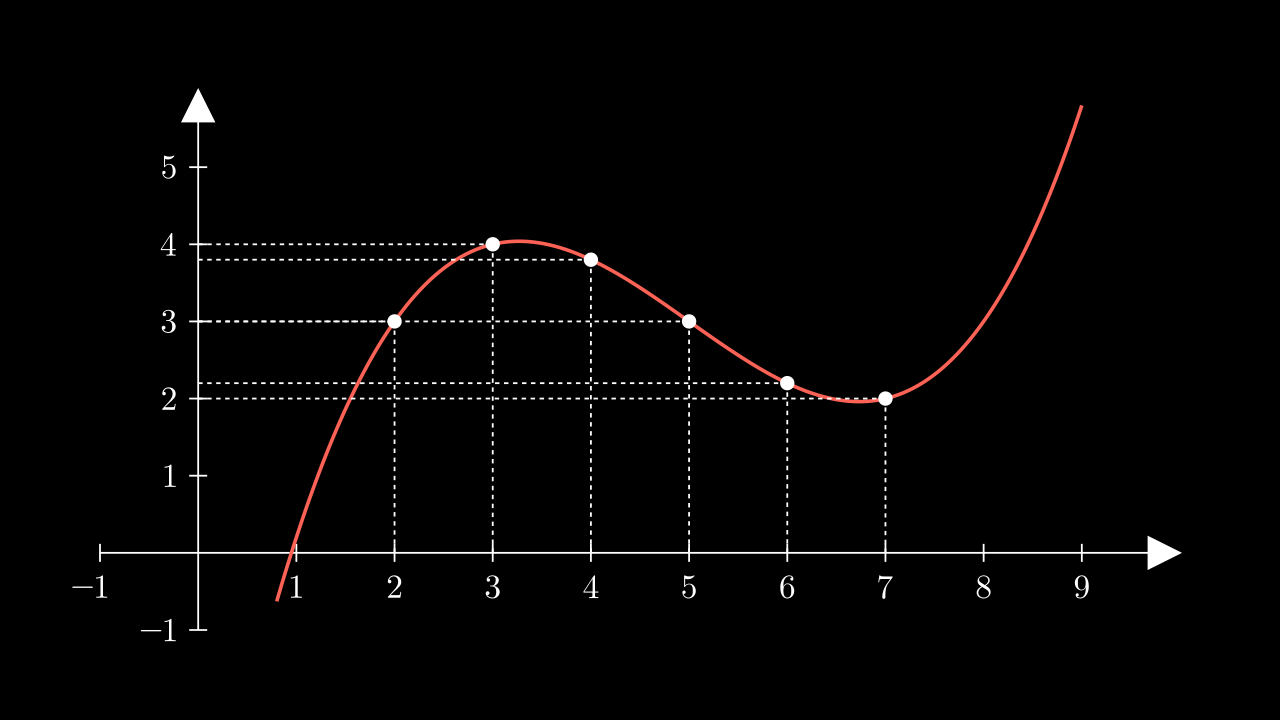

In [30]:
%%manim -qm -v WARNING E25

class E25(Scene):
    def construct(self):
        func = lambda x: 0.1 * (x - 2) * (x - 8) * (x - 5) + 3
        axes = Axes(
            axis_config={"include_numbers": True},
            x_range=[-1,10,1],
            y_range=[-1,6,1]
        )
        plot = axes.plot(func,x_range=[0.8,9,0.01],color=RED)
        x_values = range(2,8)

        dots = VGroup(*[
            Dot(axes.i2gp(x,plot))
            for x in x_values
        ])
        lines = VGroup(*[
            axes.get_lines_to_point(d.get_center())
            for d in dots
        ])

        self.add(axes,plot,dots,lines)